Histogram - A histogram gives you the distribution of a column in a dataset. It is used for numerical data rather than categorical.The histogram takes all the values and splits them into intervals. 
in the column and plots the frequency of each data point. This graph will give you the distribution of the data whether it is normalized or skewed left or right. You can also view outliers in the dataset. The shape is the main takeaway from this visualization as it tells you how the data is distributed.

bar- The bar chart is used for categorical data rather than numerical and displays how frequently that cateogorical information appears in the column of a dataset. It displays all of the data as bars. 

Line - The line plot will also show the frequency like the histogram however it will show the exact number of times a value occurs rather than splitting the data into intervals. 

Boxplot - The boxplot shows the distribution of the data in a box form and will display some of the more descriptive statistics like the median, 1st quartile, 3rd quartile as well as outliers in the dataset. The outliers are typically shown as dots and extend beyond the box. 

Heatmap- The heatmap gives the correlation of all the values in the dataset. This graph is useful because its uses color schemes to show which columns have the strongest correlations. 

Pie - The pie chart is useful because it gives the percentage breakdown of each category in a column in the data frame which includes categorical data. 



In [185]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv('Airline-Sentiment-2-w-AA.csv')

In [85]:
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/2015 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,5.700000e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/2015 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,5.700000e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/2015 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,5.700000e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/2015 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,5.700000e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/2015 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,5.700000e+17,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,681679794,False,finalized,3,2/25/2015 19:46,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,5.700000e+17,NaN,NaN
14636,681679795,False,finalized,3,2/25/2015 19:14,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,5.700000e+17,Texas,NaN
14637,681679796,False,finalized,3,2/25/2015 19:04,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/2015 11:59,5.700000e+17,"Nigeria,lagos",NaN
14638,681679797,False,finalized,3,2/25/2015 18:59,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/2015 11:59,5.700000e+17,New Jersey,Eastern Time (US & Canada)


In [109]:
df[df['airline'] == 'Southwest'].loc[:,['airline_sentiment','text','airline', 'negativereason_gold']]

,airline_sentiment,text,airline,negativereason_gold
4326,negative,@SouthwestAir still waiting. Just hit one hour.,Southwest,NaN
4327,negative,@SouthwestAir although I'm not happy you Cance...,Southwest,NaN
4328,negative,@SouthwestAir Hello - been on hold for extreme...,Southwest,NaN
4329,neutral,@SouthwestAir I'm teaching new #travelers how ...,Southwest,NaN
4330,negative,@SouthwestAir Very frustrated for the loooooon...,Southwest,NaN
...,...,...,...,...
6741,negative,@SouthwestAir won't answer their phones #Horri...,Southwest,NaN
6742,negative,@SouthwestAir We have been stuck in SJU for se...,Southwest,NaN
6743,positive,@SouthwestAir nice work on the update!,Southwest,NaN
6744,negative,@SouthwestAir you guys there? Are we on hour 2...,Southwest,NaN


<AxesSubplot:>

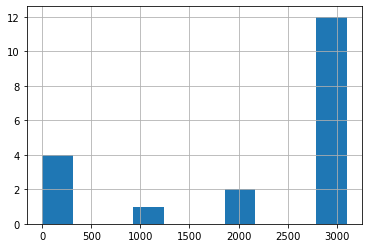

In [43]:
#Distribution for neutral sentiment
df.groupby('airline_sentiment').count().iloc[1,:].hist()

<AxesSubplot:>

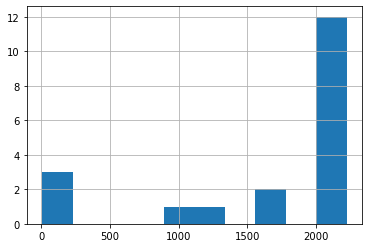

In [40]:
#Distribution for Delta sentiment
df.groupby('airline').count().iloc[1,:].hist()

In [81]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

([<matplotlib.patches.Wedge at 0x208ae6bd4c0>,
 [Text(0.7503132816269462, 0.8043817373698904, 'United'),
  Text(-0.7041085836202399, 0.8451219453264125, 'US Airways'),
  Text(-1.0366690370873182, -0.3678550088614437, 'American'),
  Text(-0.12999433663974685, -1.0922918439874905, 'Southwest'),
  Text(0.8461786665248315, -0.7028382917273774, 'Delta'),
  Text(1.093572858985168, -0.11873669226909424, 'Virgin America')],
 [Text(0.40926178997833423, 0.43875367492903106, '26.11'),
  Text(-0.3840592274292217, 0.46097560654167946, '19.90'),
  Text(-0.5654558384112643, -0.20064818665169654, '18.85'),
  Text(-0.07090600180349828, -0.5957955512659039, '16.53'),
  Text(0.46155199992263535, -0.38336634094220584, '15.18'),
  Text(0.5964942867191826, -0.06476546851041504, '3.44')])

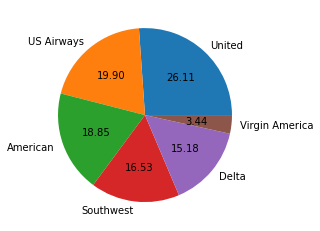

In [165]:
total = sum(df['airline'].value_counts())
plt.pie(df['airline'].value_counts(),labels=df['airline'].value_counts().index, autopct='%.2f')

In [55]:
df.groupby('airline').count().iloc[:,7]

airline
American          1960
Delta              955
Southwest         1186
US Airways        2263
United            2633
Virgin America     181
Name: negativereason, dtype: int64

Text(0.5, 1.0, 'Which airlines had the most negative feedback')

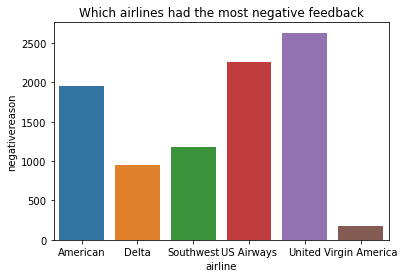

In [110]:
sns.barplot(data=df, x=df.groupby('airline').count().iloc[:,7].index, y=df.groupby('airline').count().iloc[:,7])
plt.title('Which airlines had the most negative feedback')

Text(0, 0.5, 'Count of each response')

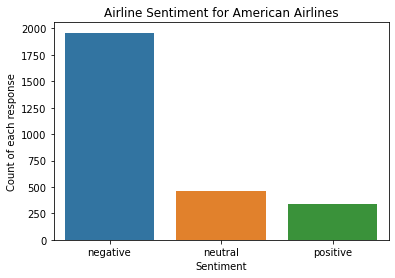

In [125]:
t = df[df['airline'] == 'American']
sns.barplot(x=t['airline_sentiment'].value_counts().index, y=t['airline_sentiment'].value_counts())
plt.title('Airline Sentiment for American Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Count of each response')

Text(0, 0.5, 'Count of each response')

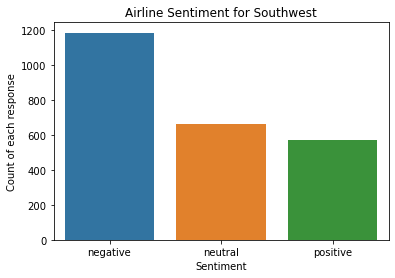

In [132]:
t = df[df['airline'] == 'Southwest']
sns.barplot(x=t['airline_sentiment'].value_counts().index, y=t['airline_sentiment'].value_counts())
plt.title('Airline Sentiment for Southwest')
plt.xlabel('Sentiment')
plt.ylabel('Count of each response')

Which airlines are doing a good job capturing customer satisfaction? Virgin America, Delta

How should American airlines strategically differentiate themselves in the coming year? What opportunities do they have?
They should improve there quality. Even though get more buisiness than other airlines they have a lot of negative feedback. They could pursue more gold.

How should Southwest airlines strategically differentiate themselves in the coming year? What opportunities do they have? Similar situation as American however more positive/ neutral sentiment from this airline company. 

In [135]:
df2 = pd.read_csv('C:/Users/shnai/OneDrive/Desktop/Data_Specialization/week-10/Twitter-sentiment-self-drive-DFE.csv')
df2.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...


Text(0, 0.5, 'confidence level')

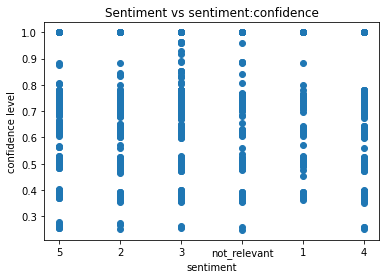

In [138]:
plt.scatter(data=df2,x='sentiment', y='sentiment:confidence')
plt.title('Sentiment vs sentiment:confidence')
plt.xlabel('sentiment')
plt.ylabel('confidence level')

Text(0, 0.5, 'length of text')

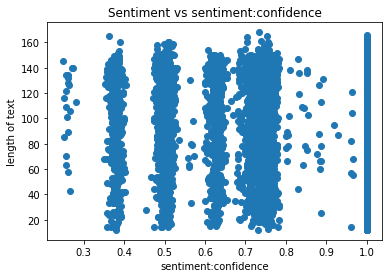

In [145]:
plt.scatter(data=df2,x='sentiment:confidence', y='length of text')
plt.title('Sentiment vs sentiment:confidence')
plt.xlabel('sentiment:confidence')
plt.ylabel('length of text')

In [141]:
df2['length of text'] = df['text'].apply(lambda x: len(x))

0        35
1        72
2        71
3       126
4        55
       ... 
7151     63
7152     99
7153     78
7154     63
7155     70
Name: length of text, Length: 7156, dtype: int64

In [148]:
confid_greater = df2[df2['sentiment:confidence'] > .8]

([<matplotlib.patches.Wedge at 0x208ae719e80>,
 [Text(-0.8200114330615639, 0.7331993246371145, '3'),
  Text(0.5217625106158752, -0.9683820953093975, '4'),
  Text(0.9595839060727696, -0.537772002995811, '2'),
  Text(1.0701121217768657, -0.2546763570224269, '5'),
  Text(1.0953858870487168, -0.1006467011605243, 'not_relevant'),
  Text(1.0997395608038605, -0.023935296173893915, '1')],
 [Text(-0.4472789634881257, 0.39992690434751693, '76.78'),
  Text(0.2845977330632046, -0.5282084156233077, '12.18'),
  Text(0.5234094033124197, -0.29333018345226053, '5.83'),
  Text(0.5836975209691994, -0.1389143765576874, '2.99'),
  Text(0.5974832111174818, -0.05489820063301325, '1.53'),
  Text(0.5998579422566511, -0.013055616094851225, '0.69')])

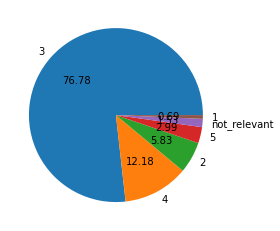

In [167]:
total = sum(confid_greater['sentiment'].value_counts())
plt.pie(confid_greater['sentiment'].value_counts(), labels=confid_greater['sentiment'].value_counts().index,
       autopct='%.2f')

In [179]:
r = df2[df2['_unit_state'] == 'finalized']


In [196]:
def remove(text):
    text = ''.join([i for i in text if i not in string.punctuation])
    re.split('\s+', text)
    return text